(35,)


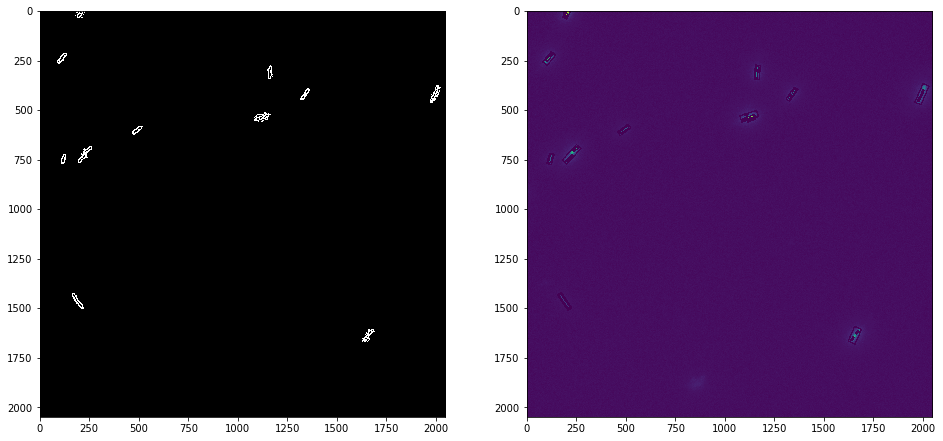

In [144]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread('FM15-M13GFP-2.png', 0)
image_edge_detect = cv.GaussianBlur(image,(5,5), 0)
edge = cv.Canny(image_edge_detect,6,20)
edge = cv.dilate(edge, None, iterations=2)
edges = cv.erode(edge, None, iterations=2)
edged, contours, hierarchy = cv.findContours(edge, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

filteredcnt = [ i for i in contours if cv.contourArea(i)>50]
edge = cv.drawContours(image.copy(),filteredcnt,-1,(0,255,0),3)

def creBOX(coordinate):
    rect = cv.minAreaRect(coordinate)
    box = cv.boxPoints(rect)
    box = np.int0(box)
    return box

box_edge_con = [creBOX(i) for i in filteredcnt]
box_edge = cv.drawContours(image.copy(), box_edge_con, -1, (0,0,255), 5)

print(np.array(filteredcnt).shape)

plt.figure(figsize=(16,35))
plt.subplot(121)
plt.imshow(edged, cmap = 'gray')
plt.subplot(122)
plt.imshow(box_edge)
plt.show()


### Note
* cv.imread(path, 0) use parameter '0' to read a image as grayscale